In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
# Selecing relevant column
col = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[col]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

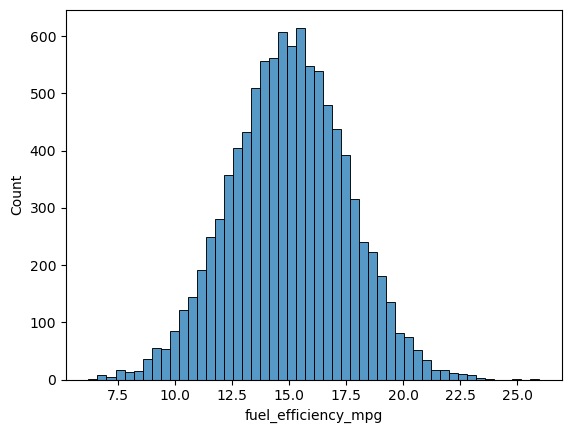

In [4]:
# Checking fuel_efficiency_mpg
sns.histplot(df.fuel_efficiency_mpg, bins=50)

fuel_efficiency_mpg has normal distribution

In [5]:
# Checking the missing value
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [6]:
# Checking the median value of horsepower
df.horsepower.median()

149.0

**Splitting the Data**

In [7]:
# Find the best number
n = len(df)

n_train = int(n * 0.6)
print('Size of the training data:', n_train)

n_val = int(n * 0.2)
print('Size of the validation data:', n_val)

n_test = int(n * 0.2)
print('Size of the test data:', n_test)

print('Total size of data:', n_train + n_val + n_test)

Size of the training data: 5822
Size of the validation data: 1940
Size of the test data: 1940
Total size of data: 9702


In [8]:
# Generate num of o to n
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703])

In [9]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [10]:
# Split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [11]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
8387,160,111.0,3038.134712,2002,14.203076
7331,160,157.0,2877.624938,2006,15.278030
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094


In [12]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
2052,250,154.0,2254.313245,2002,18.925748
1776,210,152.0,2435.203606,2004,17.965284
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
...,...,...,...,...,...
6602,220,138.0,4027.743139,2016,9.778218
4008,170,122.0,3425.964440,2016,12.508967
7802,290,205.0,3403.401496,2019,13.868607
6780,200,159.0,2752.516039,2009,15.665403


In [13]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1577,220,169.0,3293.420251,2008,13.733343
3906,200,117.0,2692.781292,2004,15.816050
3729,140,148.0,2704.826005,2017,15.804354
7764,210,136.0,3001.227490,2004,14.272374
4358,210,152.0,3747.467392,2021,11.748441
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [14]:
# Reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
# Create the target variable and log it
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [16]:
y_train

array([2.8703359 , 2.85061269, 2.97511223, ..., 2.88837278, 2.40325308,
       2.92279789])

In [17]:
# Delete the target variables from df
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [18]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,250,154.0,2254.313245,2002
1,210,152.0,2435.203606,2004
2,180,112.0,2772.134410,2020
3,260,138.0,3014.061530,2022
4,140,181.0,3652.186151,2016


**Fill the #N/A with each 0 and mean value, then compare the rmse score** 

In [19]:
# Define linear regression
def train_lr(X, y):
    # Define bias term
    ones = np.ones(X.shape[0])

    # Add bias term into X
    X = np.column_stack([ones, X])

    # Define the calculation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [86]:
# Define RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    score = np.sqrt(mse)

    return score

**With fillna 0**

In [21]:
# fill na with 0
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

In [22]:
# Create matrix X
X_train_0 = df_train_0.values
X_val_0 = df_val_0.values

In [23]:
# Train 0 model
w0, w = train_lr(X_train_0, y_train)

In [24]:
# pred and get the score
y_pred = w0 + X_val_0.dot(w)
rmse(y_val, y_pred)

np.float64(0.04)

**With Mean**

In [25]:
# Generate the mean with df_train
train_mean = df_train.mean()

In [26]:
# Fillna with mean
X_train_mean = df_train.fillna(train_mean).values.astype(np.float64)
X_val_mean = df_val.fillna(train_mean).values.astype(np.float64)

In [28]:
# Train mean model
w0, w = train_lr(X_train_mean, y_train)

In [29]:
# Get pred and rmse score
y_pred = w0 + X_val_mean.dot(w)
rmse(y_val, y_pred)

np.float64(0.04)

**Perform Regularization**

In [32]:
# Define train_lr with regularization
def train_lr(X, y, r=0.001):
    # Define bias term
    ones = np.ones(X.shape[0])

    # Add bias term into X
    X = np.column_stack([ones, X])

    # Define the calculation
    XTX = X.T.dot(X)

    # Add alpha into the diagonal
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [35]:
# Train the model with fillna 0 with regularizations
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_lr(X_train_0, y_train, r=r)

    y_pred = w0 + X_val_0.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 3.665577285734095 0.03997161732242242
0.01 3.169350694196921 0.03997029923841629
0.1 1.4286836761338657 0.04050247817861146
1 0.22006271844695696 0.04134889421432059
5 0.04623373414189703 0.04150133949182226
10 0.023264028654348224 0.04152204563627104
100 0.002340587378545946 0.04154102199577845


**Search for the best seed**

In [50]:
# Define the splitting df
def split_seed(df, seed):
    np.random.seed(seed)

    # Define the split n
    n = len(df)
    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)

    # Generate idx for shuffling
    idx = np.arange(n)
    np.random.shuffle(idx)

    # Split df with idx shuffling
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    # Create target variable
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    # Drop target variable from X matrix
    df_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    df_val = df_val.drop('fuel_efficiency_mpg', axis=1)
    df_test = df_test.drop('fuel_efficiency_mpg', axis=1)

    # Fillna 0
    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    df_test = df_test.fillna(0)

    # Get matrix X
    X_train = df_train.values
    X_val = df_val.values
    X_test = df_test.values

    # Train lr
    w0, w = train_lr(X_train, y_train)

    # Get rmse
    y_pred = w0 + X_val_0.dot(w)
    rmse_value = rmse(y_val, y_pred)
    return rmse_value

In [52]:
# Define the seeds and empty array for rmse
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_value = []

In [53]:
# Perform the loop
for seed in seeds:
    score = split_seed(df, seed)
    rmse_value.append(score) 

In [56]:
# Calculate the std
std = np.std(rmse_value)
rstd = round(std, 3)

In [60]:
print(f"All RMSE values: {np.array(rmse_value)}")
print(f"The Standard Deviation of RMSE values: {std:.5f}")
print(f"Rounded Standard Deviation: {rstd}")

All RMSE values: [0.23 0.24 0.23 0.24 0.23 0.23 0.23 0.23 0.23 0.23]
The Standard Deviation of RMSE values: 0.00400
Rounded Standard Deviation: 0.004


**Seed 9, combine train + val, and train the data with r=0.001** 

In [62]:
# Set the idx
np.random.seed(9)
np.random.shuffle(idx)

In [63]:
# Split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [64]:
# Reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [65]:
# Create the target variable and log it
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [66]:
# Delete the target variables from df
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [67]:
# Combine train and val
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

In [79]:
# Fillna 0
df_full_train = df_full_train.fillna(0)

In [80]:
df_test = df_test.fillna(0)

In [81]:
# Get the matrix X
X_full_train = df_full_train.values

In [82]:
# Combine y train and val
y_full_train = np.concatenate([y_train, y_val])

In [83]:
# Train the model
w0, w = train_lr(X_full_train, y_full_train, r=0.001)

In [84]:
# Get the X_test
X_test = df_test.values

In [87]:
# Get the pred
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.03772757328928083)